In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

DATA_PROCESSED = Path("../data_processed")

# Use the new long-format returns
returns = pd.read_parquet(DATA_PROCESSED / "returns_long_universe.parquet")

# 1) Per-asset summary stats
summary = returns.groupby("ticker")["ret"].agg(
    mean="mean",
    std="std",
    skew=lambda x: x.skew(),
    kurtosis=lambda x: x.kurt(),
)
summary


,mean,std,skew,kurtosis
ticker,,,,
AAPL,0.000941,0.017772,-0.151399,6.121489
AMZN,0.000882,0.020664,0.031863,5.953125
BAC,0.000370,0.020993,-0.317604,10.154065
CVX,0.000320,0.016883,-0.927561,26.046087
GLD,0.000314,0.009966,-0.501302,4.746034
GOOGL,0.000755,0.017396,0.125003,7.085535
GS,0.000469,0.018162,-0.254088,8.303651
HD,0.000723,0.014711,-0.989131,18.273950
HYG,0.000206,0.005257,-0.252150,19.150714


In [2]:
wide = returns.pivot(index="date", columns="ticker", values="ret")
wide = wide.dropna(how="all")

corr = wide.corr()
corr


ticker,AAPL,AMZN,BAC,CVX,GLD,GOOGL,GS,HD,HYG,IEF,...,NVDA,PFE,PG,QQQ,SLV,SPY,TLT,UNH,WFC,XOM
ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.486311,0.390809,0.346774,0.051177,0.545038,0.429737,0.457821,0.507948,-0.147419,...,0.484965,0.298403,0.328133,0.770786,0.167634,0.689891,-0.166709,0.319064,0.373005,0.316558
AMZN,0.486311,1.000000,0.326739,0.249277,0.014285,0.593281,0.369718,0.400331,0.429822,-0.104888,...,0.474831,0.232321,0.197978,0.716640,0.122619,0.611703,-0.120426,0.248973,0.314033,0.224072
BAC,0.390809,0.326739,1.000000,0.539519,-0.073084,0.399049,0.775430,0.473399,0.568068,-0.359722,...,0.358042,0.359513,0.301019,0.554458,0.100811,0.703317,-0.387565,0.373398,0.792536,0.519141
CVX,0.346774,0.249277,0.539519,1.000000,0.088680,0.338203,0.535507,0.421995,0.530488,-0.241618,...,0.289381,0.344041,0.295339,0.468294,0.234462,0.632209,-0.256618,0.369037,0.540380,0.833586
GLD,0.051177,0.014285,-0.073084,0.088680,1.000000,0.032567,-0.029130,0.019780,0.126914,0.284010,...,0.021316,0.013170,0.054075,0.052828,0.782157,0.051906,0.218109,0.013441,-0.051126,0.062385
GOOGL,0.545038,0.593281,0.399049,0.338203,0.032567,1.000000,0.446932,0.430623,0.492877,-0.147074,...,0.501542,0.290439,0.282395,0.755376,0.143822,0.685387,-0.164289,0.313967,0.389392,0.309974
GS,0.429737,0.369718,0.775430,0.535507,-0.029130,0.446932,1.000000,0.497763,0.567858,-0.290558,...,0.407687,0.346320,0.297462,0.608206,0.133946,0.732352,-0.315686,0.366345,0.730404,0.510195
HD,0.457821,0.400331,0.473399,0.421995,0.019780,0.430623,0.497763,1.000000,0.553216,-0.112645,...,0.394024,0.366980,0.418400,0.620412,0.129848,0.694081,-0.136139,0.392133,0.479473,0.369309
HYG,0.507948,0.429822,0.568068,0.530488,0.126914,0.492877,0.567858,0.553216,1.000000,-0.039463,...,0.450427,0.391476,0.395274,0.685556,0.246967,0.766942,-0.104567,0.382423,0.541343,0.477731


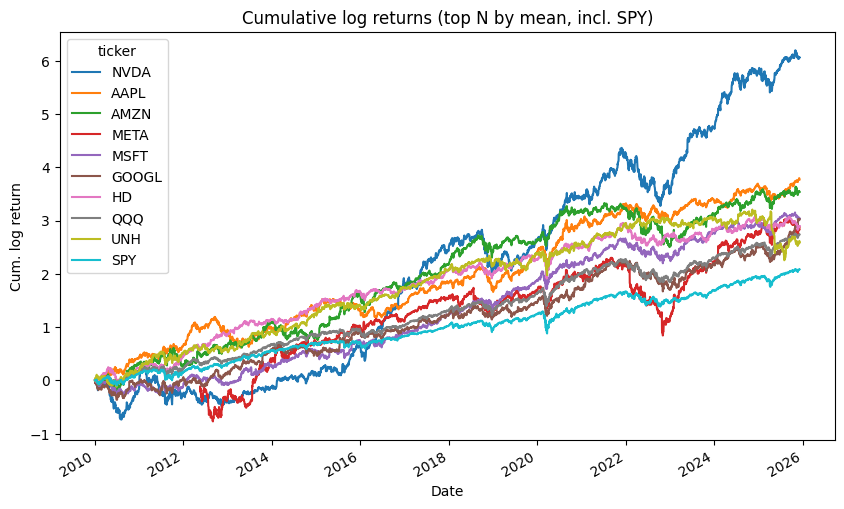

In [4]:
N = 10

# Sort tickers by mean return, descending
means_sorted = summary["mean"].sort_values(ascending=False)

# Start with top N by mean
topN = list(means_sorted.head(N).index)

# Force-include SPY if it exists in the data
if "SPY" in wide.columns and "SPY" not in topN:
    if len(topN) >= N:
        # Drop the last one to keep length N, then add SPY
        topN = topN[: N - 1] + ["SPY"]
    else:
        topN.append("SPY")

# Final subset that definitely includes SPY (if available)
subset = [t for t in topN if t in wide.columns]

wide[subset].cumsum().plot(figsize=(10, 6))
plt.title("Cumulative log returns (top N by mean, incl. SPY)")
plt.xlabel("Date")
plt.ylabel("Cum. log return")
plt.show()
